In [1]:
library(dplyr)
library(raster)
library(terra)
library(sf)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: sp


Attaching package: ‘raster’


The following object is masked from ‘package:dplyr’:

    select


terra 1.7.78

Linking to GEOS 3.12.2, GDAL 3.9.2, PROJ 9.5.0; sf_use_s2() is TRUE



In [2]:
#======================================================
# Working with multipart zip files in unix is annoying
#======================================================
# zip -FF gSSURGO_CONUS.zip --out gSSURGO_CONUS_combined_fix.zip
# unzip gSSURGO_CONUS_combined_fix.zip

#========================================================
# Just printing out the layer names from the Geodatabase
#========================================================
layer_names <- st_layers("/data-store/iplant/home/rjramos/gssurgo/gSSURGO_CONUS.gdb")$name
layer_names

#=========================================
# Reading the raster from the geodatabase
#=========================================
r <- rast(
  "/data-store/iplant/home/rjramos/gssurgo/gSSURGO_CONUS.gdb",
  subds = c("gSSURGO_CONUS")
)

#=====================================================
# Reading the raster atribute table from the database
# Unfortunatly, its stored as just a table
#=====================================================
rat <- st_read(
  "/data-store/iplant/home/rjramos/gssurgo/gSSURGO_CONUS.gdb",
  layer = c("Valu1_1")
)

#======================================================
# Merging the original RAT (categories in terra speak)
# with the provided rat in the geodatabase (Valu1)
#======================================================
levels(r) <- relocate( # value needs to be the first column
  mutate( # value needs to be numeric
    merge( # merge the tables!
      levels(r),
      rat,
      by.x = "MUKEY", by.y = "mukey"
    ),
    value = as.numeric(Value), # value needs to be lower case
    .keep = "unused" # drop the orginal capitilized column
  ),
  value, .before = 1
)

#================================================
# Just checking that the RAT was added correctly
#================================================
cats(r)

[1] "chaashto"           "chconsistence"      "chdesgnsuffix"     
 [4] "chfrags"            "chorizon"           "chpores"           
 [7] "chstruct"           "chstructgrp"        "chtext"            
[10] "chtexture"          "chtexturegrp"       "chtexturemod"      
[13] "chunified"          "cocanopycover"      "cocropyld"         
[16] "codiagfeatures"     "coecoclass"         "coeplants"         
[19] "coerosionacc"       "coforprod"          "coforprodo"        
[22] "cogeomordesc"       "cohydriccriteria"   "cointerp"          
[25] "comonth"            "component"          "copm"              
[28] "copmgrp"            "copwindbreak"       "corestrictions"    
[31] "cosoilmoist"        "cosoiltemp"         "cosurffrags"       
[34] "cosurfmorphgc"      "cosurfmorphhpp"     "cosurfmorphmr"     
[37] "cosurfmorphss"      "cotaxfmmin"         "cotaxmoistcl"      
[40] "cotext"             "cotreestomng"       "cotxfmother"       
[43] "distinterpmd"       "distlegendmd"       "distmd"            
[46] "featdesc"           "laoverlap"          "legend"            
[49] "legendtext"         "mapunit"            "month"             
[52] "muaggatt"           "muaoverlap"         "mucropyld"         
[55] "mutext"             "sacatalog"          "sainterp"          
[58] "sdvalgorithm"       "sdvattribute"       "sdvfolder"         
[61] "sdvfolderattribute" "mdstatdomdet"       "mdstatdommas"      
[64] "mdstatidxdet"       "mdstatidxmas"       "mdstatrshipdet"    
[67] "mdstatrshipmas"     "mdstattabcols"      "mdstattabs"        
[70] "FEATLINE"           "FEATPOINT"          "MULINE"            
[73] "MUPOINT"            "SAPOLYGON"          "MUPOLYGON"         
[76] "DominantComponent"  "Valu1"              "Valu1_1"           
[79] "SDV_Symbology"

Reading layer `Valu1_1' from data source 
  `/data-store/iplant/home/rjramos/gssurgo/gSSURGO_CONUS.gdb' 
  using driver `OpenFileGDB'


Warning message:
“no simple feature geometries present: returning a data.frame or tbl_df”


value,MUKEY,aws0_5,aws5_20,aws20_50,aws50_100,aws100_150,aws150_999,aws0_20,aws0_30,⋯,nccpi3soy,nccpi3cot,nccpi3sg,nccpi3all,pctearthmc,rootznemc,rootznaws,droughty,pwsl1pomu,musumcpct
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
100000,100000,6.77,20.32,39.32,53.01,49.30,1.98,27.10,40.26,⋯,0.328,0.001,0.478,0.478,100,150,169,0,NA,100
100001,100001,8.42,25.25,50.49,88.80,57.92,0.59,33.66,50.49,⋯,0.612,0.001,0.585,0.612,99,150,233,0,1,100
1000027,1000027,8.97,26.92,50.27,78.75,78.75,14.62,35.90,53.55,⋯,0.784,0.001,0.704,0.900,75,61,113,1,NA,100
100003,100003,10.15,30.43,60.76,88.29,63.07,31.95,40.57,60.75,⋯,0.565,0.001,0.567,0.567,70,150,260,0,2,100
100005,100005,10.89,32.67,65.34,90.29,57.92,0.59,43.56,65.34,⋯,0.630,0.001,0.638,0.638,99,150,260,0,1,100
100007,100007,5.31,15.92,35.01,93.19,92.80,92.80,21.22,31.80,⋯,0.492,0.001,0.458,0.492,85,150,254,0,2,100
100008,100008,7.95,25.19,25.87,31.33,31.20,31.20,33.14,45.25,⋯,0.158,0.001,0.256,0.256,90,150,119,1,96,100
100009,100009,8.50,25.50,26.00,35.00,35.00,1.40,34.00,46.00,⋯,0.057,0.001,0.058,0.058,100,150,130,1,100,100
100010,100010,6.05,19.20,22.95,30.00,30.00,30.00,25.25,35.04,⋯,0.173,0.001,0.175,0.223,95,150,108,1,55,100


In [3]:
#=========================
# Lets get category names
#=========================
colnames(as.data.frame(cats(r)))

[1] "value"      "MUKEY"      "aws0_5"     "aws5_20"    "aws20_50"  
 [6] "aws50_100"  "aws100_150" "aws150_999" "aws0_20"    "aws0_30"   
[11] "aws0_100"   "aws0_150"   "aws0_999"   "tk0_5a"     "tk5_20a"   
[16] "tk20_50a"   "tk50_100a"  "tk100_150a" "tk150_999a" "tk0_20a"   
[21] "tk0_30a"    "tk0_100a"   "tk0_150a"   "tk0_999a"   "musumcpcta"
[26] "soc0_5"     "soc5_20"    "soc20_50"   "soc50_100"  "soc100_150"
[31] "soc150_999" "soc0_20"    "soc0_30"    "soc0_100"   "soc0_150"  
[36] "soc0_999"   "tk0_5s"     "tk5_20s"    "tk20_50s"   "tk50_100s" 
[41] "tk100_150s" "tk150_999s" "tk0_20s"    "tk0_30s"    "tk0_100s"  
[46] "tk0_150s"   "tk0_999s"   "musumcpcts" "nccpi3corn" "nccpi3soy" 
[51] "nccpi3cot"  "nccpi3sg"   "nccpi3all"  "pctearthmc" "rootznemc" 
[56] "rootznaws"  "droughty"   "pwsl1pomu"  "musumcpct"

Warning message in x@ptr$sampleRegularRaster(size):
“GDAL Error 1: Error occurred in /home/conda/feedstock_root/build_artifacts/libgdal-core_1727089005355/work/ogr/ogrsf_frmts/openfilegdb/filegdbtable.cpp at line 1517”
Warning message in x@ptr$sampleRegularRaster(size):
“GDAL Error 1: Error occurred in /home/conda/feedstock_root/build_artifacts/libgdal-core_1727089005355/work/ogr/ogrsf_frmts/openfilegdb/filegdbtable.cpp at line 1517”
Warning message in x@ptr$sampleRegularRaster(size):
“GDAL Error 1: Error occurred in /home/conda/feedstock_root/build_artifacts/libgdal-core_1727089005355/work/ogr/ogrsf_frmts/openfilegdb/filegdbtable.cpp at line 1517”
Warning message in x@ptr$sampleRegularRaster(size):
“GDAL Error 1: Error occurred in /home/conda/feedstock_root/build_artifacts/libgdal-core_1727089005355/work/ogr/ogrsf_frmts/openfilegdb/filegdbtable.cpp at line 1517”
Warning message in x@ptr$sampleRegularRaster(size):
“GDAL Error 1: Error occurred in /home/conda/feedstock_root/build_artifa

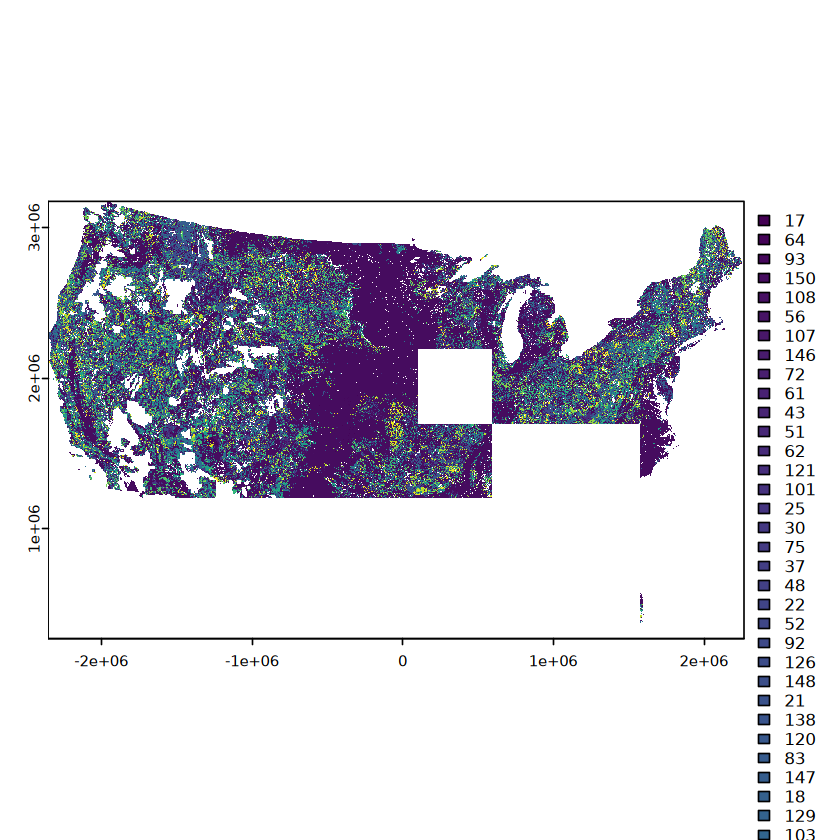

In [4]:
activeCat(r) <- 'rootznemc'
plot(r)

In [7]:
s <- rast(
  "/home/workspace/data-store/home/rjramos/daymet/daymet_v4_prcp_annttl_na_1980.nc"
)
plot(s)
x <- resample(r, s, method = "near")


Warning message in x@ptr$warp(y@ptr, "", method, FALSE, FALSE, TRUE, opt):
“GDAL Error 1: Error occurred in /home/conda/feedstock_root/build_artifacts/libgdal-core_1727089005355/work/ogr/ogrsf_frmts/openfilegdb/filegdbtable.cpp at line 1517”
Warning message in x@ptr$warp(y@ptr, "", method, FALSE, FALSE, TRUE, opt):
“GDAL Error 1: Error occurred in /home/conda/feedstock_root/build_artifacts/libgdal-core_1727089005355/work/ogr/ogrsf_frmts/openfilegdb/filegdbtable.cpp at line 1517”
Warning message in x@ptr$warp(y@ptr, "", method, FALSE, FALSE, TRUE, opt):
“GDAL Error 1: Error occurred in /home/conda/feedstock_root/build_artifacts/libgdal-core_1727089005355/work/ogr/ogrsf_frmts/openfilegdb/filegdbtable.cpp at line 1517”
Warning message in x@ptr$warp(y@ptr, "", method, FALSE, FALSE, TRUE, opt):
“GDAL Error 1: Error occurred in /home/conda/feedstock_root/build_artifacts/libgdal-core_1727089005355/work/ogr/ogrsf_frmts/openfilegdb/filegdbtable.cpp at line 1517”
Warning message in x@ptr$warp(y@

In [ ]:
x <- resample(r, s, method = "near", threads = TRUE)
plot(x)